In [1]:
! pip install ultralytics

In [2]:
! pip3 install torch torchvision torchaudio

In [3]:
! pip install Pillow

### Required Imports

In [7]:
from ultralytics import YOLO
import torch
import os
import cv2
from IPython import display
from PIL import Image

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Load the model

In [14]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt").to(device)

100%|██████████| 49.7M/49.7M [00:00<00:00, 106MB/s] 


In [15]:
%pwd

'/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo'

In [16]:
%cd /home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo

/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo


/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Training the model

In [17]:
model.train(
    data="/home/kambhamettu.s/Projects/mining/models/yolov8_models/data.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    device=device,
    optimizer="AdamW",  # Better for convergence
    lr0=0.001,  # Reduce learning rate
    weight_decay=0.0001,  # Reduce overfitting
    augment=True,
    mosaic=1.0,
    mixup=0.1
)


Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/kambhamettu.s/Projects/mining/models/yolov8_models/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning /home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/labels/train.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/labels/val.cache... 1000 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will

Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.72G      1.323      1.355      1.289         36        640: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.78it/s]

                   all       1000       1155      0.873      0.643      0.735      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.77G      1.164      0.849      1.153         18        640: 100%|██████████| 63/63 [00:14<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.86it/s]

                   all       1000       1155      0.806      0.728      0.775      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.77G      1.162     0.8175       1.15         23        640: 100%|██████████| 63/63 [00:14<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]

                   all       1000       1155      0.466      0.406      0.319      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.74G      1.153     0.8019      1.167         16        640: 100%|██████████| 63/63 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]

                   all       1000       1155      0.772      0.477      0.632      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.76G      1.111      0.804      1.143         24        640: 100%|██████████| 63/63 [00:14<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1000       1155      0.875      0.721      0.796      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.77G      1.095     0.7431       1.12         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]

                   all       1000       1155      0.799      0.653      0.749      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.77G      1.098     0.7315      1.127         19        640: 100%|██████████| 63/63 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]

                   all       1000       1155       0.82      0.629      0.714      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.69G      1.044       0.68      1.093         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]


                   all       1000       1155      0.832      0.715      0.792      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.75G      0.993     0.6427      1.071         17        640: 100%|██████████| 63/63 [00:14<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.43it/s]

                   all       1000       1155      0.886       0.81      0.892      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.77G      1.011     0.6563      1.076         13        640: 100%|██████████| 63/63 [00:13<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all       1000       1155      0.747      0.781       0.82      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.77G      1.018     0.6572      1.072         19        640: 100%|██████████| 63/63 [00:13<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.51it/s]


                   all       1000       1155      0.876      0.714      0.838      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.69G          1      0.637      1.077         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.12it/s]

                   all       1000       1155       0.83      0.745      0.806      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.76G      1.002     0.6191      1.071         24        640: 100%|██████████| 63/63 [00:13<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1000       1155      0.857       0.78      0.847      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.77G     0.9772     0.6082      1.055         26        640: 100%|██████████| 63/63 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.47it/s]

                   all       1000       1155      0.859      0.718      0.838      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.77G     0.9607     0.5946      1.055         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]

                   all       1000       1155      0.909      0.804      0.886      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.71G     0.9171      0.572      1.032         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]

                   all       1000       1155       0.89      0.858      0.913       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.75G     0.9299     0.5764       1.04         22        640: 100%|██████████| 63/63 [00:14<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.83it/s]

                   all       1000       1155      0.876      0.783      0.849      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.76G     0.9132     0.5528      1.028         29        640: 100%|██████████| 63/63 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all       1000       1155       0.87      0.705      0.794      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.77G     0.9127     0.5568      1.018         24        640: 100%|██████████| 63/63 [00:14<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all       1000       1155      0.893      0.813      0.876      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.69G      0.888     0.5357      1.017         17        640: 100%|██████████| 63/63 [00:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all       1000       1155      0.872      0.794      0.876      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.76G       0.91     0.5491      1.028         20        640: 100%|██████████| 63/63 [00:14<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.83it/s]

                   all       1000       1155      0.923      0.787       0.89      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.76G     0.8815     0.5333      1.015         20        640: 100%|██████████| 63/63 [00:14<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]


                   all       1000       1155       0.92      0.831      0.914      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.77G      0.908     0.5493      1.031         25        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all       1000       1155      0.882      0.829        0.9      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.69G     0.8564     0.5084      0.992         25        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.13it/s]

                   all       1000       1155      0.895      0.786       0.87      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.75G     0.8862     0.5132      1.009         17        640: 100%|██████████| 63/63 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all       1000       1155       0.85       0.84      0.893      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.77G     0.8532     0.4985     0.9935         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.27it/s]


                   all       1000       1155      0.913      0.836      0.922      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.78G     0.8684     0.5007      1.005         17        640: 100%|██████████| 63/63 [00:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.33it/s]


                   all       1000       1155      0.895      0.829      0.903      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.71G     0.8639     0.5116      1.006         16        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]

                   all       1000       1155      0.911      0.847      0.922      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.77G     0.8498     0.4996      1.003         35        640: 100%|██████████| 63/63 [00:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.30it/s]

                   all       1000       1155      0.914      0.854      0.919      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.74G     0.8413      0.488     0.9981         30        640: 100%|██████████| 63/63 [00:13<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1000       1155      0.865      0.837        0.9      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.75G      0.825     0.4843     0.9855         16        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1000       1155      0.882      0.805      0.896      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.69G     0.8305     0.5008     0.9907         17        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1000       1155      0.912      0.871      0.926      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.77G     0.8168     0.4841     0.9801         29        640: 100%|██████████| 63/63 [00:13<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]

                   all       1000       1155      0.909      0.831      0.923      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.77G      0.811     0.4748       0.98         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all       1000       1155      0.923      0.817      0.915      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.76G     0.8308     0.4781     0.9792         19        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.24it/s]


                   all       1000       1155      0.875       0.81      0.893      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.71G     0.7937     0.4613     0.9699         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all       1000       1155      0.808      0.774      0.847      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.77G     0.7829     0.4556     0.9632         27        640: 100%|██████████| 63/63 [00:13<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all       1000       1155      0.925      0.838      0.924      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.79G     0.8053     0.4595     0.9742         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.22it/s]

                   all       1000       1155      0.922      0.821      0.916      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.76G     0.7914     0.4538     0.9624         16        640: 100%|██████████| 63/63 [00:14<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.18it/s]

                   all       1000       1155      0.886      0.833      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.71G     0.7935     0.4545     0.9709         28        640: 100%|██████████| 63/63 [00:14<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.18it/s]

                   all       1000       1155      0.937      0.815      0.917      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.77G     0.7737     0.4399     0.9544         26        640: 100%|██████████| 63/63 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.18it/s]

                   all       1000       1155      0.884      0.858      0.925      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.76G     0.7849     0.4359      0.967         11        640: 100%|██████████| 63/63 [00:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1000       1155      0.904      0.877      0.928      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.76G     0.7759     0.4574     0.9718         17        640: 100%|██████████| 63/63 [00:14<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.86it/s]

                   all       1000       1155      0.933      0.814       0.92      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.71G     0.7582     0.4333     0.9612         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all       1000       1155      0.914      0.853      0.928      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.77G     0.7886     0.4536     0.9786         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1000       1155      0.928       0.83       0.93      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.74G     0.7645     0.4338     0.9631         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]

                   all       1000       1155      0.915      0.838       0.93      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.77G     0.7791     0.4442     0.9655         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.33it/s]

                   all       1000       1155      0.885      0.861      0.925      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.71G     0.7466     0.4239     0.9484         16        640: 100%|██████████| 63/63 [00:13<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all       1000       1155       0.91       0.86      0.936       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.74G     0.7562     0.4289     0.9557         24        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]

                   all       1000       1155      0.934       0.84      0.932      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.76G     0.7513     0.4299      0.951         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1000       1155      0.868      0.847      0.907      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.76G     0.7375     0.4169     0.9545         13        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.21it/s]

                   all       1000       1155      0.854      0.852      0.906      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.71G     0.7491     0.4176     0.9507         26        640: 100%|██████████| 63/63 [00:13<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all       1000       1155      0.928      0.812      0.923      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.77G     0.7292     0.4084     0.9443         28        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.31it/s]

                   all       1000       1155      0.909      0.833      0.913      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.77G     0.7347     0.4147      0.943         13        640: 100%|██████████| 63/63 [00:13<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1000       1155        0.9      0.854      0.931      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.77G      0.735     0.4032     0.9429         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1000       1155      0.948      0.833      0.936      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.69G     0.7226     0.4008     0.9353         23        640: 100%|██████████| 63/63 [00:13<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.17it/s]

                   all       1000       1155      0.945       0.84      0.921      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.76G     0.7234     0.4031     0.9423         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.45it/s]


                   all       1000       1155      0.909       0.88       0.93      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       7.8G     0.7221     0.4096     0.9414         32        640: 100%|██████████| 63/63 [00:13<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.74it/s]

                   all       1000       1155      0.925      0.881      0.936      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.74G     0.7421     0.4144      0.948         23        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.64it/s]

                   all       1000       1155      0.932      0.865      0.934      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.71G      0.707     0.3869     0.9321         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.21it/s]

                   all       1000       1155      0.931      0.842       0.92      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.74G     0.7083     0.3924     0.9411         13        640: 100%|██████████| 63/63 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1000       1155      0.943      0.876      0.948      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.75G     0.6995     0.3843     0.9357         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]

                   all       1000       1155      0.932      0.877      0.948      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.76G     0.6844     0.3792      0.928         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.17it/s]

                   all       1000       1155      0.923      0.897      0.951      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.71G     0.6902     0.3885     0.9312         16        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]


                   all       1000       1155      0.937      0.861      0.938      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.76G      0.689     0.3773     0.9292         15        640: 100%|██████████| 63/63 [00:13<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.24it/s]

                   all       1000       1155      0.933      0.867       0.94      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.76G     0.6795     0.3801     0.9248         23        640: 100%|██████████| 63/63 [00:13<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       1000       1155       0.94      0.834      0.929      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.77G     0.6817     0.3866     0.9227         24        640: 100%|██████████| 63/63 [00:13<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]

                   all       1000       1155      0.943      0.893      0.949      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.71G     0.6728     0.3741     0.9196         25        640: 100%|██████████| 63/63 [00:13<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.26it/s]

                   all       1000       1155      0.934      0.893      0.948      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.75G     0.6772       0.38     0.9309         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all       1000       1155      0.944      0.904       0.95      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.75G     0.6766     0.3717     0.9304         20        640: 100%|██████████| 63/63 [00:14<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]

                   all       1000       1155      0.932      0.874      0.948      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.78G     0.6597     0.3606     0.9131         28        640: 100%|██████████| 63/63 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]

                   all       1000       1155       0.93       0.86      0.941      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.71G     0.6535     0.3578     0.9202         28        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all       1000       1155      0.926      0.858      0.936      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.77G     0.6672     0.3679     0.9238         35        640: 100%|██████████| 63/63 [00:13<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1000       1155      0.914      0.845       0.93      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.78G     0.6605     0.3682     0.9236         25        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.29it/s]

                   all       1000       1155      0.922      0.852      0.936      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.77G     0.6626     0.3623     0.9245         15        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.13it/s]

                   all       1000       1155      0.913      0.877       0.94      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.71G     0.6297     0.3446     0.9077         14        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.16it/s]

                   all       1000       1155       0.94      0.869      0.936      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.78G     0.6542     0.3575     0.9152         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.29it/s]

                   all       1000       1155      0.939      0.867      0.937      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.74G     0.6236     0.3403     0.9078         22        640: 100%|██████████| 63/63 [00:13<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all       1000       1155      0.935      0.868      0.934      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.78G     0.6438      0.351     0.9173         27        640: 100%|██████████| 63/63 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.26it/s]


                   all       1000       1155      0.941      0.869      0.942      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.71G     0.6411     0.3466     0.9087         23        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.17it/s]

                   all       1000       1155      0.935      0.881      0.945      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.77G     0.6141     0.3323     0.9014         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.27it/s]

                   all       1000       1155       0.91      0.899      0.945      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.77G     0.6245     0.3388     0.9058         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]

                   all       1000       1155       0.94      0.848      0.939      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.79G     0.6256     0.3384     0.9165         25        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.34it/s]

                   all       1000       1155      0.924      0.874      0.935      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.69G     0.6381     0.3476     0.9087         31        640: 100%|██████████| 63/63 [00:13<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.29it/s]

                   all       1000       1155      0.946      0.861       0.94      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.76G     0.6082     0.3243     0.9095         22        640: 100%|██████████| 63/63 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]

                   all       1000       1155      0.932      0.861      0.935      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.76G     0.6081     0.3368     0.8974         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]

                   all       1000       1155      0.939      0.876      0.945      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.76G     0.6308     0.3387     0.9058         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]

                   all       1000       1155      0.915      0.882      0.942      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.71G     0.6089     0.3221     0.8935         18        640: 100%|██████████| 63/63 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.81it/s]

                   all       1000       1155      0.938      0.881      0.948      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.76G     0.5977     0.3181     0.9042         20        640: 100%|██████████| 63/63 [00:13<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all       1000       1155      0.934      0.883      0.949      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.76G     0.6081     0.3238     0.8983         21        640: 100%|██████████| 63/63 [00:13<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]

                   all       1000       1155      0.935       0.89      0.949      0.678


Closing dataloader mosaic


/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.78G     0.5715     0.2874      0.882         13        640: 100%|██████████| 63/63 [00:15<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]

                   all       1000       1155      0.921      0.886      0.941      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.71G     0.5572     0.2746     0.8618         11        640: 100%|██████████| 63/63 [00:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.46it/s]

                   all       1000       1155      0.909      0.874      0.933      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.75G     0.5446     0.2758     0.8639         11        640: 100%|██████████| 63/63 [00:13<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.76it/s]

                   all       1000       1155      0.919      0.858      0.935      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.76G     0.5418      0.271     0.8554          9        640: 100%|██████████| 63/63 [00:13<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]

                   all       1000       1155      0.929      0.862      0.938      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.77G     0.5372      0.268     0.8518         12        640: 100%|██████████| 63/63 [00:13<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.30it/s]

                   all       1000       1155      0.911      0.874      0.938      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.71G     0.5324     0.2618     0.8592          8        640: 100%|██████████| 63/63 [00:13<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.19it/s]

                   all       1000       1155      0.923      0.876      0.938      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.76G     0.5306     0.2591     0.8611         10        640: 100%|██████████| 63/63 [00:13<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.32it/s]

                   all       1000       1155      0.928      0.877      0.939      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.75G     0.5243     0.2569     0.8502          9        640: 100%|██████████| 63/63 [00:12<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.15it/s]

                   all       1000       1155       0.93      0.878      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.75G     0.5234     0.2564     0.8566         11        640: 100%|██████████| 63/63 [00:12<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.52it/s]

                   all       1000       1155      0.929      0.876      0.943      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.71G     0.5227     0.2574     0.8533          8        640: 100%|██████████| 63/63 [00:12<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.43it/s]

                   all       1000       1155      0.935      0.871      0.943      0.683



100 epochs completed in 0.586 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 52.0MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]


                   all       1000       1155      0.881      0.887      0.929      0.677
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train14


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2ae6ef9d6650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Model Validation

In [18]:
results = model.val()
print(results)

Ultralytics YOLOv8.2.96 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/labels/val.cache... 1000 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:13<00:00,  4.64it/s]


                   all       1000       1155      0.918      0.852      0.929      0.677
Speed: 0.1ms preprocess, 9.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train142
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2ae6ef92d840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [8]:
# Load and run inference
test_img = "/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/images/val/0000007.jpg"  # Make sure this path is correct
image = cv2.imread(test_img)
results = model(test_img)

NameError: name 'model' is not defined

In [51]:
%cd /home/kambhamettu.s/Projects/mining/models/yolov8_models/results

/home/kambhamettu.s/Projects/mining/models/yolov8_models/results


In [ ]:
# Solution 3: Save the image instead of displaying
output_image = results[0].plot()
plt.figure(figsize=(10, 8))
plt.imshow(output_image)
plt.axis('off')
plt.savefig('/home/kambhamettu.s/Projects/mining/models/yolov8_models/results/detection_results_coal_miner.jpg')  # This will save the image to your current directory
plt.close()

In [46]:
%pwd

'/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo'

## Plots of all the metrics of the model

### Confusion Matrix

In [87]:
%pwd

'/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo'

In [1]:
%cd /home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14

/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14


/home/kambhamettu.s/.conda/envs/mining/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


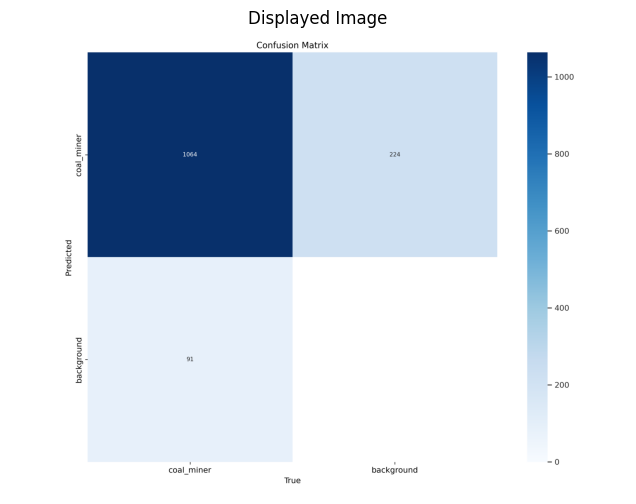

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14/confusion_matrix.png")

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title('Displayed Image')
plt.show()


In [ ]:
# from ultralytics.utils.metrics import ConfusionMatrix
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# class CustomConfusionMatrix(ConfusionMatrix):
#     def __init__(self, nc=2, conf=0.25, iou_thres=0.45):
#         super().__init__(nc, conf, iou_thres)
#         self.image_size = 640  # Default YOLO image size
#         self.grid_size = 32    # Size of grid cells to consider for true negatives
    
#     def calculate_true_negatives(self):
#         """
#         Calculate true negatives based on grid cells that don't contain 
#         either predictions or ground truth objects
#         """
#         total_cells = (self.image_size // self.grid_size) ** 2
#         # Assuming cells without detections or ground truth are true negatives
#         # This is a simplified approach - you might want to adjust based on your needs
#         return total_cells - np.sum(self.matrix)
    
#     def process_batch(self, detections, labels):
#         """
#         Override the process_batch method to include true negatives
#         """
#         super().process_batch(detections, labels)
#         self.matrix[1, 1] = self.calculate_true_negatives()
    
#     def plot(self, normalize=True, save_dir='', names=()):
#         """
#         Plot the confusion matrix with true negatives included
#         """
#         matrix = self.matrix.copy()
#         if normalize:
#             matrix = matrix / (matrix.sum(1).reshape(-1, 1) + 1E-6)  # avoid div by 0
        
#         # Create figure and axes
#         fig, ax = plt.subplots(figsize=(10, 8))
        
#         # Plot using seaborn
#         sns.heatmap(matrix, 
#                     annot=True, 
#                     fmt='.2f' if normalize else '.0f',
#                     square=True,
#                     cmap='Blues',
#                     xticklabels=['coal_miner', 'background'],
#                     yticklabels=['coal_miner', 'background'])
        
#         # Customize the plot
#         ax.set_title('Confusion Matrix')
#         ax.set_xlabel('Predicted')
#         ax.set_ylabel('True')
        
#         # Save if directory is provided
#         if save_dir:
#             plt.savefig(f"{save_dir}/confusion_matrix_coal_miner.png", bbox_inches='tight', dpi=300)
        
#         return fig, ax

# # Usage example:
# def evaluate_with_custom_matrix(model, val_loader):
#     # Initialize the custom confusion matrix
#     confusion_matrix = CustomConfusionMatrix(nc=1)  # 2 classes: coal_miner and background
    
#     # Evaluate on validation set
#     for images, labels in val_loader:
#         predictions = model(images)
#         confusion_matrix.process_batch(predictions, labels)
    
#     # Plot the matrix
#     confusion_matrix.plot(save_dir='/home/kambhamettu.s/Projects/mining/models/yolov8_models/results')
#     plt.show()

In [21]:
%pwd

'/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14'

### F1 curve

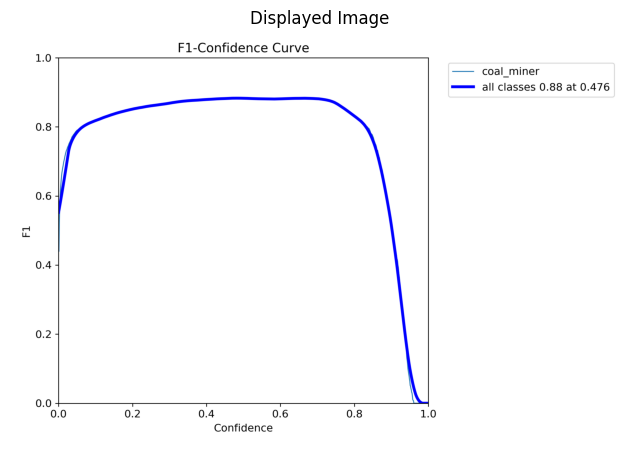

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14/F1_curve.png")

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title('Displayed Image')
plt.show()


### Results

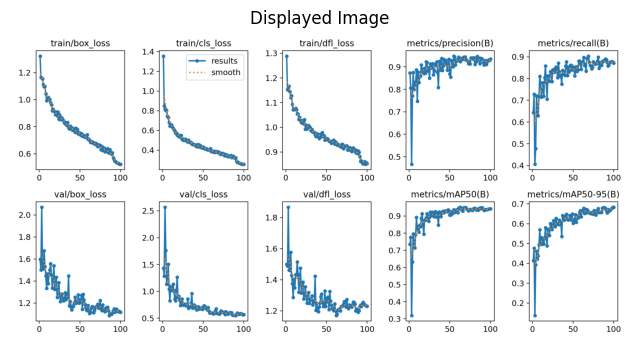

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image

img = mpimg.imread("/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14/results.png")

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title('Displayed Image')
plt.show()


In [104]:
%pwd

'/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo'

In [114]:
%cd ..

/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo


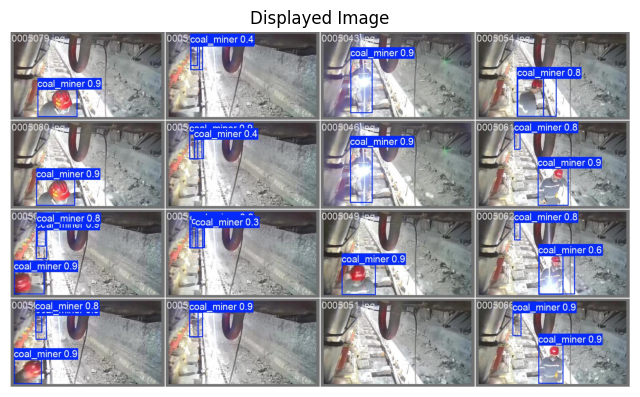

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread("/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/runs/detect/train14/val_batch0_pred.jpg")

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title('Displayed Image')
plt.show()

### Save the Model

In [111]:
# Save the model
model.save('model1s.pt')

### Validate the Model

### Get absolute path

In [71]:
import os

# Relative path
relative_path = 'Projects/mining/coal_miner_data2023_yolo/runs/detect/train1142/confusion_matrix_normalized.png'

# Get absolute path
absolute_path = os.path.abspath(relative_path)

print(absolute_path)


/home/kambhamettu.s/Projects/mining/coal_miner_data2023_yolo/Projects/mining/coal_miner_data2023_yolo/runs/detect/train1142/confusion_matrix_normalized.png
